In [3]:
from datetime import date,timedelta
from nsepy import get_history
import pandas as pd
import yfinance as yf
import numpy as np

In [4]:
names = ['3MINDIA.NS', 'ACC.NS', 'AIAENG.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ABBOTINDIA.NS', 'ADANIGAS.NS',
         'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ADVENZYMES.NS',
         'AEGISCHEM.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'AKZOINDIA.NS', 'APLLTD.NS', 'ALKEM.NS', 'ALLCARGO.NS', 'AMARAJABAT.NS',
         'AMBER.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'ARVINDFASN.NS', 'ASAHIINDIA.NS', 'ASHOKLEY.NS',
         'ASHOKA.NS', 'ASIANPAINT.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ASTRAL.NS', 'ATUL.NS', 'AUROPHARMA.NS', 'AVANTIFEED.NS', 
         'DMART.NS', 'AXISBANK.NS', 'BASF.NS', 'BEML.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJAJCON.NS', 'BAJAJELEC.NS', 'BAJFINANCE.NS', 
         'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALKRISIND.NS', 'BALMLAWRIE.NS', 'BALRAMCHIN.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 
         'BANKINDIA.NS', 'MAHABANK.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BERGEPAINT.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS',
         'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'INFRATEL.NS', 'BIOCON.NS', 'BIRLACORPN.NS', 'BSOFT.NS', 'BLISSGVS.NS', 
         'BLUEDART.NS', 'BLUESTARCO.NS', 'BBTC.NS', 'BOMDYEING.NS', 'BOSCHLTD.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'CARERATING.NS', 
         'CCL.NS', 'CESC.NS', 'CRISIL.NS', 'CADILAHC.NS', 'CANFINHOME.NS', 'CANBK.NS', 'CAPLIPOINT.NS', 'CGCL.NS', 'CARBORUNIV.NS', 
         'CASTROLIND.NS', 'CEATLTD.NS', 'CENTRALBK.NS', 'CDSL.NS', 'CENTURYPLY.NS', 'CERA.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 
         'CHENNPETRO.NS', 'CHOLAHLDNG.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'CUB.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COLPAL.NS', 
         'CONCOR.NS', 'COROMANDEL.NS', 'CREDITACC.NS', 'CROMPTON.NS', 'CUMMINSIND.NS', 'CYIENT.NS', 'DBCORP.NS', 'DCBBANK.NS',
         'DCMSHRIRAM.NS', 'DLF.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DEEPAKNTR.NS', 'DELTACORP.NS', 'DHFL.NS', 'DBL.NS', 'DISHTV.NS', 
         'DCAL.NS', 'DIVISLAB.NS', 'DIXON.NS', 'LALPATHLAB.NS', 'DRREDDY.NS', 'EIDPARRY.NS', 'EIHOTEL.NS', 'EDELWEISS.NS', 'EICHERMOT.NS', 
         'ELGIEQUIP.NS', 'EMAMILTD.NS', 'ENDURANCE.NS', 'ENGINERSIN.NS', 'EQUITAS.NS', 'ERIS.NS', 'ESCORTS.NS', 'ESSELPACK.NS', 
         'EXIDEIND.NS', 'FDC.NS', 'FEDERALBNK.NS', 'FMGOETZE.NS', 'FINEORG.NS', 'FINCABLES.NS', 'FINPIPE.NS', 'FSL.NS', 
         'FORTIS.NS', 'FCONSUMER.NS', 'FLFL.NS', 'FRETAIL.NS', 'GAIL.NS', 'GEPIL.NS', 'GET&D.NS', 'GHCL.NS', 'GMRINFRA.NS',
         'GALAXYSURF.NS', 'GARFIBRES.NS', 'GAYAPROJ.NS', 'GICRE.NS', 'GILLETTE.NS', 'GLAXO.NS', 'GLENMARK.NS', 
         'GODFRYPHLP.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GRANULES.NS', 'GRAPHITE.NS', 
         'GRASIM.NS', 'GESHIP.NS', 'GREAVESCOT.NS', 'GRINDWELL.NS', 'GUJALKALI.NS', 'GUJGASLTD.NS', 'GMDCLTD.NS', 
         'GNFC.NS', 'GPPL.NS', 'GSFC.NS', 'GSPL.NS', 'GULFOILLUB.NS', 'HEG.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 
         'HDFCBANK.NS', 'HDFCLIFE.NS', 'HFCL.NS', 'HATSUN.NS', 'HAVELLS.NS', 'HEIDELBERG.NS', 'HERITGFOOD.NS', 
         'HEROMOTOCO.NS', 'HEXAWARE.NS', 'HSCL.NS', 'HIMATSEIDE.NS', 'HINDALCO.NS', 'HAL.NS', 'HINDCOPPER.NS', 
         'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HONAUT.NS', 'HUDCO.NS', 'HDFC.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 
         'ISEC.NS', 'ICRA.NS', 'IDBI.NS', 'IDFCFIRSTB.NS', 'IDFC.NS', 'IFBIND.NS', 'IFCI.NS', 'IIFL.NS', 'IRB.NS', 'IRCON.NS', 'ITC.NS', 
         'ITDCEM.NS', 'ITI.NS', 'INDIACEM.NS', 'ITDC.NS', 'IBULHSGFIN.NS', 'IBULISL.NS', 'IBREALEST.NS', 'IBVENTURES.NS', 'INDIAMART.NS',
         'INDIANB.NS', 'IEX.NS', 'INDHOTEL.NS', 'IOC.NS', 'IOB.NS', 'INDOSTAR.NS', 'IGL.NS', 'INDUSINDBK.NS', 'INFIBEAM.NS', 
         'NAUKRI.NS', 'INFY.NS', 'INOXLEISUR.NS', 'INTELLECT.NS', 'INDIGO.NS', 'IPCALAB.NS', 'JBCHEPHARM.NS', 'JKCEMENT.NS', 
         'JKLAKSHMI.NS', 'JKPAPER.NS', 'JKTYRE.NS', 'JMFINANCIL.NS', 'JSWENERGY.NS', 'JSWSTEEL.NS', 'JAGRAN.NS', 
         'JAICORPLTD.NS', 'JISLJALEQS.NS', 'J&KBANK.NS', 'JAMNAAUTO.NS', 'JINDALSAW.NS', 'JSLHISAR.NS', 'JSL.NS', 
         'JINDALSTEL.NS', 'JCHAC.NS', 'JUBLFOOD.NS', 'JUBILANT.NS', 'JUSTDIAL.NS', 'JYOTHYLAB.NS', 'KPRMILL.NS', 'KEI.NS', 
         'KNRCON.NS', 'KPITTECH.NS', 'KRBL.NS', 'KAJARIACER.NS', 'KALPATPOWR.NS', 'KANSAINER.NS', 'KTKBANK.NS', 
         'KARURVYSYA.NS', 'KSCL.NS', 'KEC.NS', 'KENNAMET.NS', 'KIRLOSENG.NS', 'KOLTEPATIL.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS',
         'LICHSGFIN.NS', 'LAXMIMACH.NS', 'LAKSHVILAS.NS', 'LTI.NS', 'LT.NS', 'LAURUSLABS.NS', 'LEMONTREE.NS', 'LINDEINDIA.NS', 'LUPIN.NS', 
         'LUXIND.NS', 'MASFIN.NS', 'MMTC.NS', 'MOIL.NS', 'MRF.NS', 'MAGMA.NS', 'MGL.NS', 'MAHSCOOTER.NS', 'MAHSEAMLES.NS', 'M&MFIN.NS',
         'M&M.NS', 'MAHINDCIE.NS', 'MHRIL.NS', 'MAHLOG.NS', 'MANAPPURAM.NS', 'MRPL.NS', 'MARICO.NS', 'MARUTI.NS', 'MFSL.NS', 'METROPOLIS.NS', 
         'MINDTREE.NS', 'MINDACORP.NS', 'MINDAIND.NS', 'MIDHANI.NS', 'MOTHERSUMI.NS', 'MOTILALOFS.NS', 'MPHASIS.NS', 'MCX.NS', 'MUTHOOTFIN.NS', 'NATCOPHARM.NS', 
         'NBCC.NS', 'NCC.NS', 'NESCO.NS', 'NHPC.NS', 'NIITTECH.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NTPC.NS', 'NH.NS', 'NATIONALUM.NS', 'NFL.NS',
         'NBVENTURES.NS', 'NAVINFLUOR.NS', 'NESTLEIND.NS', 'NETWORK18.NS', 'NILKAMAL.NS', 'NAM-INDIA.NS', 'OBEROIRLTY.NS', 'ONGC.NS', 'OIL.NS', 'OMAXE.NS',
         'OFSS.NS', 'ORIENTCEM.NS', 'ORIENTELEC.NS', 'ORIENTREF.NS', 'PCJEWELLER.NS', 'PIIND.NS', 'PNBHOUSING.NS', 'PNCINFRA.NS', 'PTC.NS', 'PVR.NS', 
         'PAGEIND.NS', 'PARAGMILK.NS', 'PERSISTENT.NS', 'PETRONET.NS', 
         'PFIZER.NS', 'PHILIPCARB.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PEL.NS', 'POLYCAB.NS', 'PFC.NS', 'POWERGRID.NS', 'PRAJIND.NS', 'PRESTIGE.NS', 
         'PRSMJOHNSN.NS', 'PGHL.NS', 'PGHH.NS', 'PNB.NS', 'QUESS.NS', 'RBLBANK.NS', 'RECLTD.NS', 'RITES.NS', 'RADICO.NS', 'RVNL.NS', 'RAIN.NS', 'RAJESHEXPO.NS',
         'RALLIS.NS', 'RCF.NS', 'RATNAMANI.NS', 'RAYMOND.NS', 'REDINGTON.NS', 'RELAXO.NS', 'RELCAPITAL.NS', 'RELIANCE.NS', 'RELINFRA.NS', 'RPOWER.NS', 'REPCOHOME.NS', 
         'RESPONIND.NS', 'SHK.NS', 'SBILIFE.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SRF.NS', 'SADBHAV.NS', 'SANOFI.NS', 'SCHAEFFLER.NS', 'SIS.NS', 'SFL.NS', 'SHILPAMED.NS', 'SHOPERSTOP.NS', 'SHREECEM.NS', 
         'RENUKA.NS', 'SHRIRAMCIT.NS', 'SRTRANSFIN.NS', 'SIEMENS.NS', 'SOBHA.NS', 'SOLARINDS.NS', 'SONATSOFTW.NS', 'SOUTHBANK.NS', 'SPANDANA.NS', 'SPICEJET.NS', 'STARCEMENT.NS', 'SBIN.NS', 'SAIL.NS', 'SWSOLAR.NS', 'STRTECH.NS', 
         'STAR.NS', 'SUDARSCHEM.NS', 'SPARC.NS', 'SUNPHARMA.NS', 'SUNTV.NS', 'SUNCLAYLTD.NS', 'SUNDARMFIN.NS', 'SUNDRMFAST.NS', 'SUNTECK.NS', 'SUPRAJIT.NS', 'SUPREMEIND.NS', 'SUZLON.NS', 'SWANENERGY.NS',
         'SYMPHONY.NS', 'SYNGENE.NS', 'TCIEXP.NS', 'TCNSBRANDS.NS', 'TTKPRESTIG.NS', 'TVTODAY.NS', 'TV18BRDCST.NS', 'TVSMOTOR.NS', 'TAKE.NS', 'TASTYBITE.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 
         'TATAINVEST.NS', 'TATAMTRDVR.NS', 'TATAMOTORS.NS', 'TATAPOWER.NS', 'TATASTLBSL.NS', 'TATASTEEL.NS', 'TEAMLEASE.NS', 'TECHM.NS', 'TECHNOE.NS', 'NIACL.NS', 'RAMCOCEM.NS', 'THERMAX.NS', 
         'THYROCARE.NS', 'TIMETECHNO.NS', 'TIMKEN.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TRENT.NS', 'TRIDENT.NS', 'TRITURBINE.NS', 'TIINDIA.NS', 'UCOBANK.NS', 'UFLEX.NS', 'UPL.NS', 
         'UJJIVAN.NS', 'ULTRACEMCO.NS', 'UNIONBANK.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'VGUARD.NS', 'VMART.NS',
         'VIPIND.NS', 'VRLLOG.NS', 'VSTIND.NS', 'WABAG.NS', 'VAIBHAVGBL.NS', 'VAKRANGEE.NS', 'VTL.NS', 'VARROC.NS', 'VBL.NS', 'VEDL.NS', 
         'VENKEYS.NS', 'VINATIORGA.NS', 'IDEA.NS', 'VOLTAS.NS', 'WABCOINDIA.NS', 'WELCORP.NS', 'WELSPUNIND.NS', 'WESTLIFE.NS', 'WHIRLPOOL.NS', 'WIPRO.NS', 'WOCKPHARMA.NS', 'ZEEL.NS', 'ZENSARTECH.NS', 'ZYDUSWELL.NS', 'ECLERX.NS']

In [5]:
names = ['ADANIPORTS.NS','ASIANPAINT.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS',
'BPCL.NS','BHARTIARTL.NS','INFRATEL.NS',
'BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DRREDDY.NS','EICHERMOT.NS','GAIL.NS','GRASIM.NS','HCLTECH.NS','HDFCBANK.NS','HEROMOTOCO.NS','HINDALCO.NS',
'HINDUNILVR.NS','HDFC.NS','ICICIBANK.NS',
'ITC.NS','IOC.NS','INDUSINDBK.NS','INFY.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS',
'NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS',
'RELIANCE.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS',
'TCS.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','UPL.NS','ULTRACEMCO.NS',
'VEDL.NS','WIPRO.NS','ZEEL.NS']

In [6]:
def CAGR(DF,period):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = period
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252)
    return vol

def sharpe(DF,rf,period):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df,period) - rf)/volatility(df)
    return sr

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

In [7]:
start_year = 2016
end_year = 2018
data = {}
for i in names:
    data[i] = yf.download(i,start=date(start_year,4,1),end=date(end_year,4,1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [50]:
window_fast = 10
window_slow = 20
tickers_ret = {}
tickers_signal = {}
for i in names:
    data[i]["FMA"] = data[i]['Close'].ewm(span = window_fast).mean()
    data[i]["SMA"] = data[i]['Close'].ewm(span = window_slow).mean()
    data[i]["RSI"] = RSI(data[i],14)
    tickers_ret[i] = []
    tickers_signal[i] = ""
    data[i] = data[i].bfill()

In [51]:
"""Buying at buy signal and selling at sell signal 10000 worth of stock 
    keeping profit aside and no addition of money in between
    Also if ending with a buy signal liquidationg it at last price in dataset
"""

for ticker in names:
    print("calculating daily returns for ",ticker)
    for j in range(len(data[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if data[ticker]["FMA"][j-1] <= data[ticker]["SMA"][j-1] and data[ticker]["FMA"][j] > data[ticker]["SMA"][j] and data[ticker]["RSI"][j]<50:
                tickers_signal[ticker] = "Buy"
                print("Signal Genertaed")
                
        elif tickers_signal[ticker] == "Buy":
            tickers_ret[ticker].append((data[ticker]["Adj Close"][j]/data[ticker]["Adj Close"][j-1])-1)
            if data[ticker]["FMA"][j-1] >= data[ticker]["SMA"][j-1] and data[ticker]["FMA"][j] < data[ticker]["SMA"][j]:
                tickers_signal[ticker] = ""
    print(len(data[ticker]))
    print(len(tickers_ret[ticker])) 
    data[ticker]["ret"] = np.array(tickers_ret[ticker])

calculating daily returns for  ADANIPORTS.NS
Signal Genertaed
493
493
calculating daily returns for  ASIANPAINT.NS
493
493
calculating daily returns for  AXISBANK.NS
493
493
calculating daily returns for  BAJAJ-AUTO.NS
493
493
calculating daily returns for  BAJFINANCE.NS
493
493
calculating daily returns for  BAJAJFINSV.NS
493
493
calculating daily returns for  BPCL.NS
493
493
calculating daily returns for  BHARTIARTL.NS
493
493
calculating daily returns for  INFRATEL.NS
Signal Genertaed
493
493
calculating daily returns for  BRITANNIA.NS
493
493
calculating daily returns for  CIPLA.NS
493
493
calculating daily returns for  COALINDIA.NS
Signal Genertaed
493
493
calculating daily returns for  DRREDDY.NS
493
493
calculating daily returns for  EICHERMOT.NS
493
493
calculating daily returns for  GAIL.NS
493
493
calculating daily returns for  GRASIM.NS
493
493
calculating daily returns for  HCLTECH.NS
493
493
calculating daily returns for  HDFCBANK.NS
493
493
calculating daily returns for  

In [54]:
strategy_df = pd.DataFrame()
for i in names:
    strategy_df[i] = data[i]['ret']
strategy_df["ret"] = strategy_df.mean(axis = 1)
print(CAGR(strategy_df,2))
print(sharpe(strategy_df,0.065,2))
print(max_dd(strategy_df))
strategy_df.to_csv("compiled data EMA and RSI.csv")

-0.001596418663763921
-16.538820772470167
0.008440089056354825


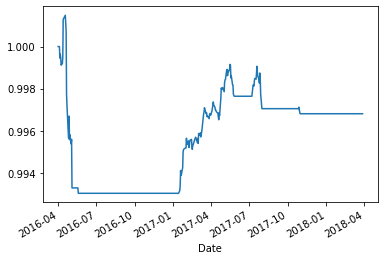

In [53]:
(1+strategy_df["ret"]).cumprod().plot()

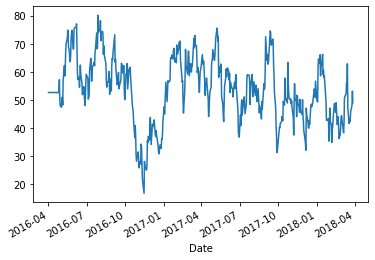

In [48]:
data[names[1]]["RSI"].plot()    

In [49]:
data[names[1]].to_csv("ASPAIN.csv")